In [25]:
#Importing all the required libraries:
import numpy as np #for linear algebra 
import pandas as pd #for data processing and for the CSV files
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Importing the data-set
data= pd.read_csv("mental-and-substance dataset.csv")
print("Importing Data is successfully done")

Importing Data is successfully done


In [8]:
#Checking whether the dataset is imported succesfully or not....
print("For this we will print first 10 values of the imported data-set")
data.head(10)

For this we will print first 10 values of the imported data-set


,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815
8,Afghanistan,AFG,1998,1.729402
9,Afghanistan,AFG,1999,1.850988


In [9]:
print("We have correctly imported Data-set ")

We have correctly imported Data-set 


In [10]:
#Finding the missing values of the Dats-set:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [11]:
#Droping the columns 
data.drop('Code',axis=1 , inplace=True)

In [12]:
data.head()

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,1.696670
1,Afghanistan,1991,1.734281
2,Afghanistan,1992,1.791189
3,Afghanistan,1993,1.776779
4,Afghanistan,1994,1.712986


In [13]:
data.size
data.shape

(6840, 3)

<AxesSubplot:>

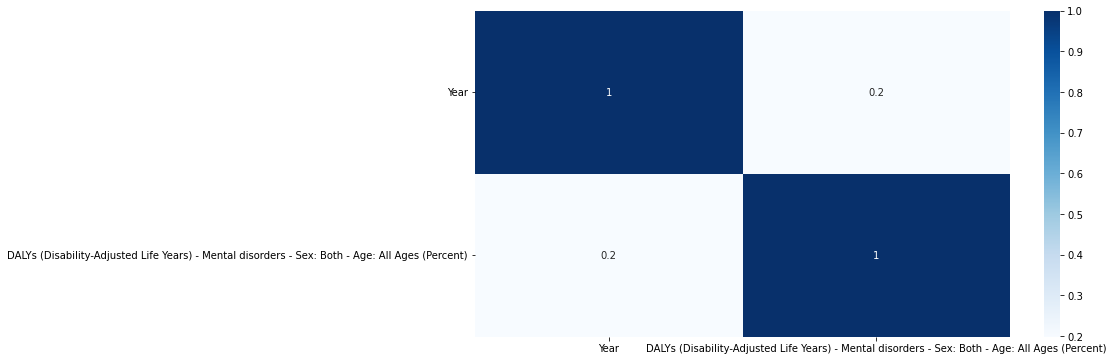

In [16]:
#Exploratary Analysis
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [27]:
mean=data['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].mean()
print(mean)

4.818061811750627


In [28]:
df = data.copy()

In [29]:
df.head()

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,1990,1.696670
1,Afghanistan,1991,1.734281
2,Afghanistan,1992,1.791189
3,Afghanistan,1993,1.776779
4,Afghanistan,1994,1.712986


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 3 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Year                                                                                             6840 non-null   int64  
 2   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 160.4+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=l.fit_transform(df[i])

In [33]:
X = df.drop('DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',axis=1)
y = df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
#Applying the LINEAR REGRESSION:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 5.158572024429303
RMSE is 2.2712490009748607
R2 score is 0.03997496858098226


The model performance for testing set
--------------------------------------
MSE is 4.6300654419712135
RMSE is 2.1517586858128896
R2 score is 0.037494090507908195


In [38]:
#Random FOREST REGRESSION:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.004697506145689712
RMSE is 0.06853835528877032
R2 score is 0.9991257806494219


The model performance for testing set
--------------------------------------
MSE is 0.030454109253796272
RMSE is 0.1745110576834496
R2 score is 0.9936691477707025
